## This notebook will be mainly used for the capstone project on accidents in Seattle Area

### 1. Introduction

Road traffic accidents are a leading cause of death in young people in the Unites States [1][2]. The average number of car accidents in the U.S. is 6 million car accidents every year, and about 6% of those accidents result in at least one death. 3 million people are injured as a result of car accidents and around 2 million drivers experience permanent injuries every year [3].

Analyzing historical vehicle crash data can help us understand the most common factors, including environmental conditions (weather, road surface conditions, and lighting conditions) and their correlation with accident severity. This information can be used to create a prediction model that can be used in conjunction with other Apps like Google Maps to predict the severity of an accident to help drivers be more alert to what can commonly lead to a severe accident. For this project, data from the City of Seattle’s’ Police Department for the years 2004 until present are utilized.

### 2. Data

In this project, shared data for Seattle city from Applied Data Science Capstone Project Week1 are used [4]. The dataset consists of 38 columns, 35 columns are the attributes or independent variables and 1 column* (column A and N) is the dependent or the predicted variable, SEVERITYCODE, and another column (column O) is the description of the code, SEVERITYDESC. The predicted variable has two values: either 1 for property damage only collision or 2 for injury collision. The dataset has more than 194,000 records representing all types of collisions provided by Seattle Police Department and recorded by Traffic record in the timeframe 2004 to 2020. This study aims to predict the impact of environmental conditions of the accidents, namely: WEATHER, ROADCAND, and LIGHTCOND. Brief explanation of each attribute can be found in the file uploaded to Github in the link below.

https://github.com/Yusser89/Coursera_Capstone/blob/master/IBMCapstoneProjectWee1_Part2.pdf

*There is a duplicate, column A and Column N both represent SEVERITYCODE

### 2.1. Feature Selection
Since the study focuses on environmental conditions of the accidents, we can narrow down the dataset to attributes under study, namely: 'WEATHER', 'ROADCOND', 'LIGHTCOND'.

In [128]:
#import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
%matplotlib inline
import seaborn as sns
!pip -q install folium
import folium

In [129]:
#Print Hello Capstone Project Course!
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [130]:
#load data file and print size of the dataset
coll_df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
print('Dimensions of dataset:', coll_df.shape)

Dimensions of dataset: (194673, 38)


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The dataset is comprised of 194673 records and 38 features

In [131]:
#View column information
coll_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [132]:
#view the first 5 rows of the dataset
coll_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [133]:
#SEVERITYDESC provides a description of the severity code
print("Road severity description types : ",coll_df['SEVERITYDESC'].value_counts())

Road severity description types :  Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64


#### So there are two severity codes: 1 for property damage only collision and 2 for injury collision

In [134]:
#Since the study focuses on environmental conditions of the accidents, we can narrow down the dataset to attributes under study and view the first 5 rows
df = coll_df[['SEVERITYCODE', 'SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
df.head()

,SEVERITYCODE,SEVERITYDESC,WEATHER,ROADCOND,LIGHTCOND
0,2,Injury Collision,Overcast,Wet,Daylight
1,1,Property Damage Only Collision,Raining,Wet,Dark - Street Lights On
2,1,Property Damage Only Collision,Overcast,Dry,Daylight
3,1,Property Damage Only Collision,Clear,Dry,Daylight
4,2,Injury Collision,Raining,Wet,Daylight


In [135]:
#print dimension of the new dataset
print('Dimensions of dataset:', df.shape)

Dimensions of dataset: (194673, 5)


### 2.2. Handling Missing Data
First we replace all question marks with NAN which can be replaced with the most frequent data from each attribute or removed. Some types of the features used in the study can be grouped together.

In [136]:
#replace all questions marks "?" with NaN
df.replace("?", np.nan, inplace = True)
#evaluate missing data or "NAN" 
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("-----------------------------------")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
-----------------------------------
SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64
-----------------------------------
WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64
-----------------------------------
ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64
-----------------------------------
LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64
-----------------------------------


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


We can see that we are missing 5081 weather data, 5012 road condition data, and 5170 light condition data. This missing information needs to be addressed.

In [137]:
#view weather conditions
print("Weather conditions reported are: ")
print(df['WEATHER'].value_counts())
print("-----------------------------------")
#view road conditions
print("Road conditions reported are: ")
print(df['ROADCOND'].value_counts())
print("-----------------------------------")
#view light conditions
print("Light conditions reported are: ")
print(df['LIGHTCOND'].value_counts())
print("-----------------------------------")

Weather conditions reported are: 
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
-----------------------------------
Road conditions reported are: 
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
-----------------------------------
Light conditions reported are: 
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                    

##### Weather conditions can be grouped as follows: 
SevereWeather: Raining, Snowing, Sleet/Hail/Freezing Rain, Fog/Smog/Smoke, Blowing Sand/Dirt, Severe Crosswind \
Overcast: PartlyCloudy and Overcast \
Unknown: Other 

In [11]:
#replacing missing values with the most frequent ones and grouping the similar types together
df["WEATHER"].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace=True)
df["WEATHER"].replace("Other","Unknown",inplace=True)
df["WEATHER"].replace("Partly Cloudy","Overcast",inplace=True)
df["WEATHER"].replace("Raining","SevereWeather",inplace=True)
df["WEATHER"].replace("Snowing","SevereWeather",inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain","SevereWeather",inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke","SevereWeather",inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt","SevereWeather",inplace=True)
df["WEATHER"].replace("Severe Crosswind","SevereWeather",inplace=True)
df['WEATHER'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Clear            116216
SevereWeather     34815
Overcast          27719
Unknown           15923
Name: WEATHER, dtype: int64

##### Road conditions can be grouped as follows:
IceOilWaterSnow: Ice, Standing Water, Oil, Snow/Slush,Sand/Mud/Dirt   \
Unknown: Other 

In [12]:
#replacing missing values with the most frequent ones and grouping the similar types together
df["ROADCOND"].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace=True)
df["ROADCOND"].replace("Ice", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Standing Water", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Oil", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Snow/Slush", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "IceOilWaterSnow", inplace=True)
df['ROADCOND'].value_counts()

Dry                129522
Wet                 47474
Unknown             15210
IceOilWaterSnow      2467
Name: ROADCOND, dtype: int64

##### Light conditions can be grouped as follows:
Dark-No-Light: Dark - No Street Lights, Dark - Street Lights Off, Dark - Unknown Lighting   \
Dark-With-Light: Dark - Street Lights On \
DuskDawn: Dusk, Dawn  \
Unknown: Other 

In [13]:
#replacing missing values with the most frequent ones and grouping the similar types together
df["LIGHTCOND"].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", "Dark-With-Light", inplace=True)
df["LIGHTCOND"].replace("Other", "Unknown", inplace=True)
df["LIGHTCOND"].replace("Dusk", "DuskDawn", inplace=True)
df["LIGHTCOND"].replace("Dawn", "DuskDawn", inplace=True)
df['LIGHTCOND'].value_counts()

Daylight           121307
Dark-With-Light     48507
Unknown             13708
DuskDawn             8404
Dark-No-Light        2747
Name: LIGHTCOND, dtype: int64

In [14]:
#display dataset information: attribute name, count, how many are null, and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 5 columns):
SEVERITYCODE    194673 non-null int64
SEVERITYDESC    194673 non-null object
WEATHER         194673 non-null object
ROADCOND        194673 non-null object
LIGHTCOND       194673 non-null object
dtypes: int64(1), object(4)
memory usage: 7.4+ MB


We can see that we now have non-null values

### 3. Methodology
In this section of the report, exploratory data analysis, inferential statistical testing, and machine learnings used are described in details.

### 3.1. Data Visualization
Number of accidents are plotted against each environmental factor (feature) with percentage of each type of each feature to understand the impact of each factor.

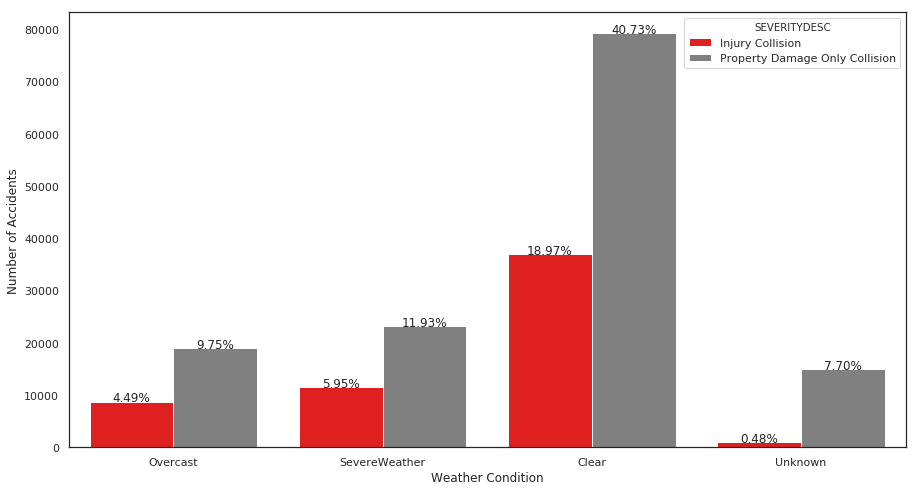

In [15]:
#Weather conditions
plt.figure(figsize=(15,8))
sns.set(style="white")
custom_palette = ["red","grey"]
sns.set_palette(custom_palette)
total = float(len(df)) # one person per row 
ax = sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
ax.set(xlabel="Weather Condition", ylabel = "Number of Accidents")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

We can see that majority of the accidents happened in clear weather. I was expecting to see more accidents in severe weather. \
We need more information on 'Unknown' weather conditions as the percentage should not be neglected particularly for accidents that caused property damage only.

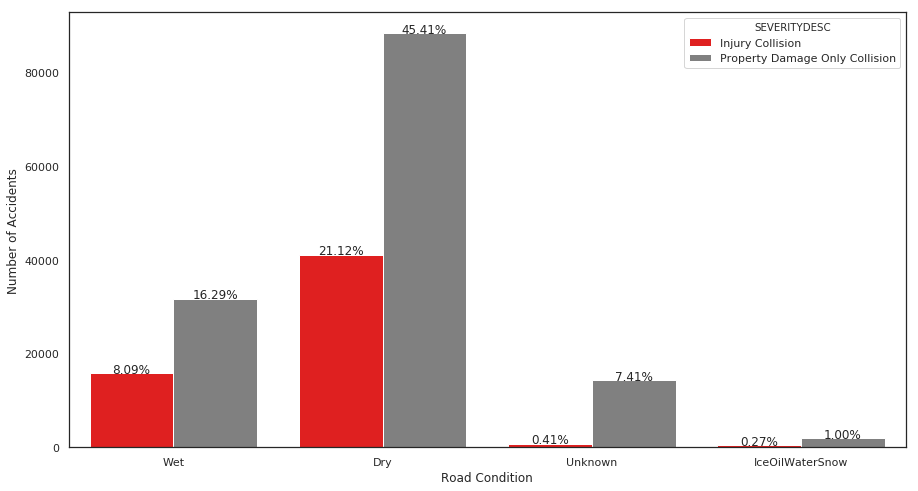

In [16]:
#road conditions
plt.figure(figsize=(15,8))
sns.set(style="white")
custom_palette = ["red","grey"]
sns.set_palette(custom_palette)
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
ax.set(xlabel="Road Condition", ylabel = "Number of Accidents")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

We can see that majority of the accidents happened on dry roads. I was expecting to see more accidents on wet or icy, snowy, oily roads.
We need more information on 'Unknown' road conditions as the percentage should not be neglected particularly for accidents that caused property damage only.

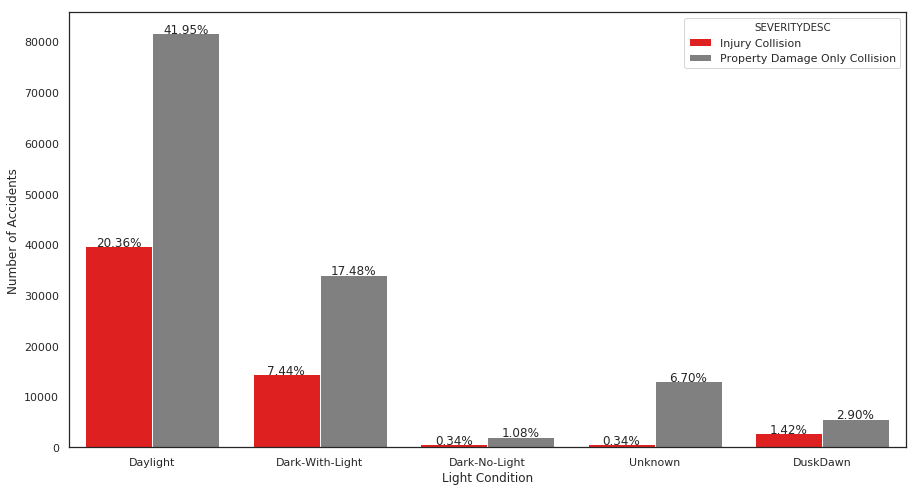

In [17]:
#light conditions
plt.figure(figsize=(15,8))
sns.set(style="white")
custom_palette = ["red","grey"]
sns.set_palette(custom_palette)
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
ax.set(xlabel="Light Condition", ylabel = "Number of Accidents")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

We can see that majority of accidents happened during the day with daylight. This also was not as I expected!
We need more information on 'Unknown' light conditions as the percentage should not be neglected particularly for accidents that caused property damage only.

### 3.2 Machine Learning Model Selection
The preprocessed dataset can be split into training and test sub datasets (70% for training and 30% for testing) using the scikit learn “train_test_split” method. Since the target column (SEVERITYCODE) is categorical, a classification model is used to predict the severity of an accident. Three classification models were trained and evaluated, namely: K-Nearest Neighbor, Decision Tree, and Logistic Regression.

Defining the X (independent variables) and y (dependent variable) data

In [18]:
#SEVERITYCODE is the dependent variable to be predicted and it is already numerical
y = np.asarray(df["SEVERITYCODE"])
y[0:5]

array([2, 1, 1, 1, 2])

In [19]:
#defining X as the enviromental features
Feature = df[['WEATHER', 'ROADCOND','LIGHTCOND']]
X = Feature.values
X[0:5]

array([['Overcast', 'Wet', 'Daylight'],
       ['SevereWeather', 'Wet', 'Dark-With-Light'],
       ['Overcast', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Daylight'],
       ['SevereWeather', 'Wet', 'Daylight']], dtype=object)

Converting Categorical features to numerical values using Label Encoding.

In [20]:
#categorical boolean mask
categorical_feature_mask = Feature.dtypes==object
categorical_feature_mask

WEATHER      True
ROADCOND     True
LIGHTCOND    True
dtype: bool

In [21]:
#filter categorical columns using mask and turn it into a list
categorical_cols = Feature.columns[categorical_feature_mask].tolist()
categorical_cols

['WEATHER', 'ROADCOND', 'LIGHTCOND']

In [22]:
#import labelencoder to convert each class under specified feature to a numerical value.
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [23]:
#apply le on categorical feature columns
Feature[categorical_cols] = Feature[categorical_cols].apply(lambda col: le.fit_transform(col))
Feature[categorical_cols].head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,WEATHER,ROADCOND,LIGHTCOND
0,1,3,2
1,2,3,1
2,1,0,2
3,0,0,2
4,2,3,2
5,0,0,2
6,2,3,2
7,0,0,2
8,0,0,2
9,0,0,2


In [24]:
#display the feature list as numerical values
X = Feature.values
X[0:5]

array([[1, 3, 2],
       [2, 3, 1],
       [1, 0, 2],
       [0, 0, 2],
       [2, 3, 2]])

In [25]:
#normalize the feature data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.24982869,  1.6059602 ,  0.11844397],
       [ 1.23126144,  1.6059602 , -1.14979445],
       [ 0.24982869, -0.68884852,  0.11844397],
       [-0.73160406, -0.68884852,  0.11844397],
       [ 1.23126144,  1.6059602 ,  0.11844397]])

### 3.2.1. Model

In [60]:
#Test/Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136271, 3) (136271,)
Test set: (58402, 3) (58402,)


### 3.2.1.1. K Nearest Neighbor(KNN)
KNN is used to predict the severity of an accident of an unknown dataset based on its proximity in the multi-dimensional hyperspace of the feature set to its “k” nearest neighbours, which have known outcomes.

Since finding the best k is memory-consuming and time-consuming, we will use k=25 based on [5].


In [61]:
from sklearn.neighbors import KNeighborsClassifier
k = 25
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [63]:
#train dataset
Kyhat_train = neigh.predict(X_train)
Kyhat_train[0:5]

array([1, 1, 1, 1, 1])

In [86]:
#test dataset
Kyhat_test = neigh.predict(X_test)
Kyhat_test[0:5]

array([1, 1, 1, 1, 1])

### 3.2.1.2. Decision Tree
A decision tree model is built from historical data of accident severity in relationship to environmental conditions. Then the trained decision tree can be used to predict the severity of an accident.

Since finding the maximum depth is also memory and time consuming, will use max_depth=30 based on [5].

In [66]:
from sklearn.tree import DecisionTreeClassifier
SevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 30)
SevTree.fit(X_train,y_train)
SevTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
#train dataset
dyhat_train = SevTree.predict(X_train)
dyhat_train[0:5]

array([1, 1, 1, 1, 1])

In [84]:
#test dataset
dyhat_test = SevTree.predict(X_test)
dyhat_test[0:5]

array([1, 1, 1, 1, 1])

### 3.2.1.3. Logistic Regression
Logistic Regression is useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

An inverse-regularisation strength of C=0.01 is used as in [5].

In [71]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
#train dataset
lyhat_train = LR.predict(X_train)
lyhat_train[0:5]

array([1, 1, 1, 1, 1])

In [87]:
#test dataset
lyhat_test = LR.predict(X_test)
lyhat_test[0:5]

array([1, 1, 1, 1, 1])

### 4. Results (Model Evaluation)
Accuracy of the 3 models is calculated in this section using these metrics: Jaccard Similarity Score, F1-SCORE, and LOGLOSS (with Linear Regression).

In [110]:
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_similarity_score

print('Jaccard Similarity Score: ')
print('KNN Model: ', jaccard_similarity_score(y_test,Kyhat_test))
print('Decision Tree: ', jaccard_similarity_score(y_test,dyhat_test))
print('Logistic Regression: ', jaccard_similarity_score(y_test,lyhat_test))
print('--------------------------')
print('F1-SCORE: ')
print('KNN Model: ', metrics.f1_score(y_test,Kyhat_test, average='weighted'))
print('Decision Tree: ', metrics.f1_score(y_test,dyhat_test, average='weighted'))
print('Logistic Regression: ', metrics.f1_score(y_test,lyhat_test, average='weighted'))
print('--------------------------')
print('LOGLOSS for Logistic Regression: ')
lyhat_test_prob=LR.predict_proba(X_test)
print(log_loss(y_test,lyhat_test_prob))

Jaccard Similarity Score: 
KNN Model:  0.6941543097839115
Decision Tree:  0.7034348138762371
Logistic Regression:  0.7034519365775145
--------------------------
F1-SCORE: 
KNN Model:  0.5912085352895935
Decision Tree:  0.5809821168927154
Logistic Regression:  0.5809904188654375
--------------------------
LOGLOSS for Logistic Regression: 
0.5991064490814039


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 5. Discussion 
First the dataset had categorical data of type 'object'. Label encoding was used to convert categorical features to numerical values. The imbalanced data issue was ignored because there was a problem installing imbalanced-learn to use imblearn. 

Once data was cleaned and analyzed, it was fed into three ML models: K-Nearest Neighbor, Decision Tree, and Logistic Regression. Values of k, max depth and hyparameter C were taken from [5] for best accuracy. Evaluation metrics used to test the accuracy of the models were jaccard index, f-1 score and logloss for Logistic Regression.

It is highly recommended to solve the data imbalance problem for more accurate results. 

### 6. Conclusion

The goal of this project is to analyze historical vehicle crash data to understand the correlation of environmental conditions (weather, road surface, and lighting conditions) with accident severity. Vehicle accident data from the City of Seattle’s’ Police Department for the years 2004 until present were Used. 
The data was cleaned, and features related to environmental conditions were selected and analyzed. It was found that majority of accidents happened in clear weather, dry roads, and during daytime which wasn't what I expected. Machine learning models; K-Nearest Neighbor, Decision Tree and Logistic Regression were used to predict the severity of an accident based on certain environmental conditions. The models used were also evaluated using different accuracy metrics.

### 7. References

1. Road Traffic Injuries and Deaths—A Global Problem. CDC, Center for Disease Control and Prevention, https://www.cdc.gov/injury/features/global-road-safety/index.html#:~:text=Road%20traffic%20crashes%20are%20a,citizens%20residing%20or%20traveling%20abroad.

2. Road Traffic Injuries. WHO, Global Health Observation Data, https://www.who.int/health-topics/road-safety#tab=tab_1

3. Car Accident Statistics in the U.S. Driver Knowledge, https://www.driverknowledge.com/car-accident-statistics/#:~:text=U.S.%20every%20year%20is%206,experience%20permanent%20injuries%20every%20year
4. Shared data for Seattle city from Applied Data Science Capstone Project Week1, https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
5. Seattle Car Accident Severity — IBM Capstone Project by AP Thomson, https://medium.com/@alasdair.p.thomson/seattle-car-accident-severity-ibm-capstone-project-9cef20fc7e6adn

Thanks
Yusser Al-Qazwini